# UAS Pembelajaran Mesin
# Projek SVM Klasifikasi Gambar

Import semua package yang diperlukan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle



**NOTE** : Masukan nama kategori benda sesuai nama file dataset

In [4]:
ICategories=['Cars','Ice cream cone','Cricket ball']
print("Ketik y untuk klasifikasi Cars,Ice Cream cone and Cricket ball");

while(True):
  check=input()
  if(check=='n' or check=='y'):
    break
  print("Please give a valid input (y/n)")
if(check=='y'):
  print("Berapa banyak tipe/kategori yang ingin diklasifikasi")
  n=int(input())
  Categories=[]
  print(f'Ketikan nama {n} kategori')
  for i in range(n):
    name=input()
    Categories.append(name)
  print(f"silahkan upload sejumlah {n} kategori dan beri nama sesuai kategorinya masing-masing")



Ketik y untuk klasifikasi Cars,Ice Cream cone and Cricket ball
y
Berapa banyak tipe/kategori yang ingin diklasifikasi
3
Ketikan nama 3 kategori
Cars
Ice Cream
Cricket Ball
silahkan upload sejumlah 3 kategori dan beri nama sesuai kategorinya masing-masing


Membuat dataFrame dari dataset yang sudah ada di google drive

In [19]:
flat_data_arr=[]
target_arr=[]
datadir='/content/drive/MyDrive/dataset'
#dataset dapat didownload di https://drive.google.com/drive/folders/1FyC2SInB45H7g9xqOrND_Ha9RKhBGmHO?usp=sharing
#lalu diupload ke gdrive
#datadir diisi alamat parent dataset contoh: '/content/drive/MyDrive/....(lokasi dataset)'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : Cars
loaded category:Cars successfully
loading... category : Ice Cream
loaded category:Ice Cream successfully
loading... category : Cricket Ball
loaded category:Cricket Ball successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.805570,0.805570,0.797727,0.805223,0.805223,0.797378,0.809650,0.810081,0.800001,0.814524,...,0.617909,0.610977,0.614412,0.616241,0.612268,0.614124,0.614974,0.614813,0.614634,0
1,0.552941,0.552941,0.552941,0.552941,0.552941,0.552941,0.552941,0.552941,0.552941,0.552941,...,0.666919,0.669414,0.653764,0.655204,0.657235,0.643112,0.648340,0.651190,0.634547,0
2,0.188032,0.175197,0.166019,0.266747,0.241835,0.178505,0.291546,0.246504,0.177794,0.292808,...,0.596285,0.600187,0.608046,0.605469,0.609391,0.620088,0.587750,0.591672,0.610687,0
3,0.264764,0.269562,0.281013,0.283545,0.274633,0.279183,0.117344,0.106521,0.102887,0.067332,...,0.540330,0.515482,0.508428,0.555654,0.537145,0.526144,0.537862,0.519078,0.511778,0
4,0.274795,0.270651,0.269177,0.278107,0.273521,0.262352,0.281866,0.272063,0.258433,0.285622,...,0.518271,0.494890,0.483551,0.534557,0.512067,0.505960,0.503353,0.479721,0.477208,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.185285,0.358038,0.153832,0.187274,0.362701,0.147490,0.190957,0.367992,0.138492,0.199026,...,0.100680,0.253051,0.076343,0.128113,0.281107,0.096708,0.153674,0.307577,0.120349,2
96,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
97,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
98,0.933333,0.937255,0.956863,0.933333,0.937255,0.956863,0.933333,0.937255,0.956863,0.933333,...,0.933333,0.937255,0.956863,0.933333,0.937255,0.956863,0.933333,0.937255,0.956863,2


memisahkan data kedalam training and testing data

In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


training data menggunakan SVC model

In [13]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("Training dimulai, mohon menunggu proses ini akan memakan waktu")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
#data training
print('The Model is trained well with the given images')
model.best_params_

Training dimulai, mohon menunggu proses ini akan memakan waktu
The Model is trained well with the given images


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Prediksi hasil testing data

In [14]:
y_pred=model.predict(x_test)
print("Hasil prediksi data :")
y_pred

Hasil prediksi data :


array([0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 2, 0, 0, 2, 1, 1])

In [15]:
print("Data yang sebenarnya:")
np.array(y_test)

Data yang sebenarnya:


array([0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 1])

In [16]:
#classification_report(y_pred,y_test)
print(f"Model ini {accuracy_score(y_pred,y_test)*100}% akurat")
#confusion_matrix(y_pred,y_test)

Model ini 85.0% akurat


gunakan Pickle untuk menyimpan model ke disk

In [17]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


The Machine-Learning Based Model sudah dibuat. sekarang waktunya tes pada gambar random di internet

Model Testing :

Enter URL of Imagehttps://awsimages.detik.net.id/community/media/visual/2023/07/09/salah-satu-es-krim-di-cold-stone-creamery-canggu-mint-ice-cream-siti-muamalah.jpeg


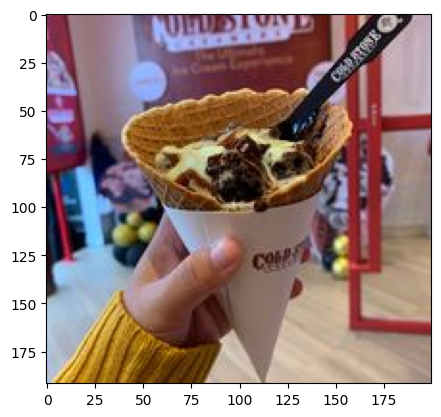

Cars = 3.207482936077726%
Ice Cream = 93.77240091870978%
Cricket Ball = 3.0201161452124805%
Prediksi ini adalah gambar : Ice Cream
Apakah ini sebuah Ice Cream ?(y/n)
y
Terima Kasih!


In [26]:
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("Prediksi ini adalah gambar : "+Categories[model.predict(l)[0]])
print(f'Apakah ini sebuah {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

#jika prediksi salah
if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Terima Kasih!")


This model learns from its mistake and rectifies them and does not repeat the same mistake again ;)